In [1]:
import random

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split 

### 1. Проанализируем данные, чтобы понять какая архитектура нейронной сети может подойти

In [2]:
data = pd.read_csv('task1.csv', names=['x1', 'x2', 'y'])
data.head()

,x1,x2,y
0,0.260573,0.862124,1
1,0.153906,0.700063,1
2,0.472929,0.825437,1
3,0.142346,0.960810,1
4,0.693491,0.999425,1


In [3]:
data.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

Пропусков в данных нет. <br>Визуализируем данные

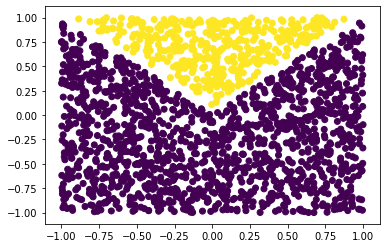

In [4]:
plt.scatter(data['x1'], data['x2'], c=data['y'])

In [5]:
X = data.drop(columns=['y'])
y = data['y']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5, shuffle=True)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1514, 2)
(379, 2)
(1514,)
(379,)


### 2. Реализация нейронной сети

Вспомогательные функции:

In [7]:
def rand_all(a):  
    # Возвращает список из а случайных элементов    
    return [random.random() for i in range(a)]

In [8]:
rand_all(2)

[0.740886066542182, 0.9897327148955166]

In [9]:
def sigma(x):
    # ф-ия активации
    return 1 / (1 + np.exp(-x))

In [11]:
def quality(X_test, y_tes, weights, porog=0.5):
    # метрики качества для классов y = {-1, 1}
    
    X1, X2 = X_test['x1'], X_test['x2']
    X1 = [i for i in X1[::]]
    X2 = [i for i in X2[::]]   
    y_test = [i for i in y_tes[::]]      
    
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for i in range(len(y_test)):        
        prediction = ns_predict(X1[i], X2[i],  weights)
        if prediction >= porog:
            prediction = 1
        else:
            prediction = -1
            
        if y_test[i] == prediction and y_test[i] == 1:
            TP += 1
        elif y_test[i] == prediction and y_test[i] == -1:
            TN += 1
        elif y_test[i] != prediction and y_test[i] == -1:
            FP += 1
        else:
            FN += 1
            
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1 = (1 + 1**2) * (precision * recall) / (1**2 *precision + recall)           
        
    return accuracy, precision, recall, f1

In [30]:
def quality01(X_test, y_tes, weights15, porog=0.5):
    # метрики качества для классов y = {0, 1}
    
    X1, X2 = X_test['x1'], X_test['x2']
    X1 = [i for i in X1[::]]
    X2 = [i for i in X2[::]]   
    y_test = [i for i in y_tes[::]]      
    
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for i in range(len(y_test)):        
        prediction = ns_predict(X1[i], X2[i],  weights15)
        if prediction >= porog:
            prediction = 1
        else:
            prediction = 0
            
        if y_test[i] == prediction and y_test[i] == 1:
            TP += 1
        elif y_test[i] == prediction and y_test[i] == 0:
            TN += 1
        elif y_test[i] != prediction and y_test[i] == 0:
            FP += 1
        else:
            FN +=1
            
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1 = (1 +1**2) * (precision * recall) / (1**2 *precision + recall)           
        
    return accuracy, precision, recall, f1

Архитектура нейронной сети.<br><br>Сеть состоит из **2 слоёв**<br> 1 слой состоит из 2 нейронов,<br> 2 слой - из 1 нейрона

In [14]:
def err_func(y, o):
    # фунция ошибки
    return 1/2 * (y - o)**2

In [15]:
def ns_fit(X_train, y_train, step=0.05, epochs=10):
    
    x3 = -1
    X1, X2 = X_train['x1'], X_train['x2']
    X1 = [i for i in X1[::]]
    X2 = [i for i in X2[::]]   
    Y = [i for i in y_train[::]]  
    
    # определяем случайным образом веса
    k11, k12, k13 = rand_all(3) 
    k21, k22, k23 = rand_all(3) 
    k31, k32 = rand_all(2) 
    #print( k11, k12, k13 )
    
    
    for ep in range(epochs):
        
        ep += 1
        for i in range(len(X1)):
            x1, x2 = X1[i], X2[i] 
            y = Y[i]

             # 1 слой
            o1 = sigma(k11*x1 + k12*x2 + k13*x3)
            o2 = sigma(k21*x1 + k22*x2 + k23*x3)

            # 2 слой    
            o3 = sigma(k31*o1 + k32*o2)

            # ошибка
            err = err_func(y, o3)

            # переопределяем веса
            delta = - (y - o3) * o3 * (1 - o3) 
            k31 -=  step * delta * o1
            k32 -= step * delta * o2

            o3 = sigma(k31*o1 + k32*o2)
            delta = - (y - o3) * o3 * (1 - o3) 

            k11 -= step * delta * k31 * o1 * (1-o1) * x1
            k12 -= step * delta * k31 * o1 * (1-o1) * x2
            k13 -= step * delta * k31 * o1 * (1-o1) * x3
            k21 -= step * delta * k32 * o2 * (1-o2) * x1
            k22 -= step * delta * k32 * o2 * (1-o2) * x2
            k23 -= step * delta * k32 * o2 * (1-o2) * x3
        
    weights = [k11, k12, k13, k21, k22, k23, k31, k32]
    
    return weights 
    

In [16]:
def ns_predict(x1, x2, weigths7):
    
    x3 = -1
    k11, k12, k13 = weigths7[:3]
    k21, k22, k23 = weigths7[3:6]
    k31, k32 =  weigths7[6:8]
    
    o1 = sigma(k11*x1 + k12*x2 + k13*x3)
    o2 = sigma(k21*x1 + k22*x2 + k23*x3)
    # 2 слой     
    o3 = sigma(k31*o1 + k32*o2)
       
    return o3

In [46]:
weights = ns_fit(X_train, y_train, step=0.1, epochs=120)

In [47]:
print(ns_predict(0.260573, 0.862124, weights)) #1
print(ns_predict(0, 1, weights))

0.4994244587895917
0.49998696021248457


In [48]:
print(ns_predict(-0.5, -0.5, weights)) # -1
print(ns_predict(-1, -1, weights))

5.717240001764955e-06
4.814206098072504e-06


In [49]:
accuracy, precision, recall, f1 = quality(X_test, y_test, weights, porog=0.25)
print("Accuracy: %4.2f, Precision: %4.2f, Recall: %4.2f, F1: %4.2f" % (accuracy, precision, recall, f1))

Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1: 1.00


Точность модели превосходная! Заменим класс -1 на 0 эксперемента ради.

In [50]:
y_train2  = y_train.apply(lambda x: 0 if x== -1 else 1)
y_test2 = y_test.apply(lambda x: 0 if x== -1 else 1)

In [55]:
weights2 = ns_fit(X_train, y_train2, step=0.1,  epochs=120)

In [56]:
print(ns_predict(0.260573, 0.862124, weights2)) #1
print(ns_predict(0, 1, weights2))

0.9944581859869669
0.999497199423882


In [57]:
print(ns_predict(-0.5, -0.5, weights2)) # 0
print(ns_predict(1, -1, weights2))

1.1554664772523919e-05
0.002973159185540254


In [62]:
accuracy, precision, recall, f1 = quality01(X_test, y_test2, weights2, porog=0.6)
print("Accuracy: %4.2f, Precision: %4.2f, Recall: %4.2f, F1: %4.2f" % (accuracy, precision, recall, f1))

Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1: 1.00


**Вывод:**<br>Нейронная сеть прекрасно справляется с кдассификацией объектов. <br> `Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1: 1.00`<br> А значит архитектура сети была выбрана правильно, а корректность реализации не вызывает сомнейний.